In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import descent
from ipywidgets import interact
from functools import partial
%matplotlib inline

/usr/local/lib/python3.5/site-packages/matplotlib-1.5.dev1-py3.5-macosx-10.11-x86_64.egg/matplotlib/__init__.py:867: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Load our noisy estimate of a cell's spatiotemporal receptive field (RF)

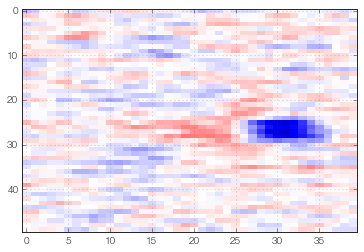

In [12]:
rf = np.loadtxt('data/cell7.csv', delimiter=',')

# helper function to visualize the receptive field
def image(x):
    plt.imshow(x, cmap='seismic', vmin=-0.5, vmax=0.5, filternorm=1.)
    
# try it
image(rf)

## Denoising

In [3]:
opt = descent.admm(rf)
opt.add('squared_error', rf)
opt.add('sparse', penalty=0.02)
opt.add('nucnorm', penalty=0.1)
opt.display = None
opt.run()

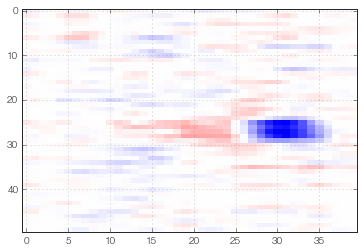

In [4]:
image(opt.theta)

## Scanning over hyperparameters

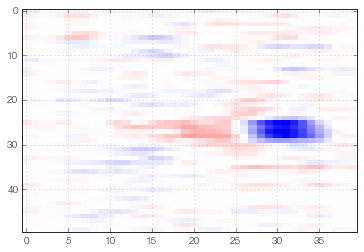

In [11]:
@interact(sparsity=(0.001, 0.05, 0.005), nucnorm=(0.001, 0.5, 0.05))
def denoise(sparsity=0.0, nucnorm=0.0):
    opt = descent.admm(rf)
    opt.add('squared_error', rf)
    opt.add('sparse', penalty=sparsity)
    opt.add('nucnorm', penalty=nucnorm)
    opt.display = None
    opt.run()
    image(opt.theta)